# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

#env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")
env = UnityEnvironment(file_name="Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

rewards = env_info.rewards
rewards = np.asarray(rewards)
print("rewards shape:", (rewards.shape))

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]
rewards shape: (2,)


In [9]:
from collections import deque
# keep training awake
from workspace_utils import keep_awake


def marl(n_episodes = 6000, print_every = 200, num_agents = 2, max_steps = 1000):
    
    scores = []
    scores_deque = deque(maxlen=100)
    avg_scores = []
    noise = 2
    noise_decay = 0.999
    last_max = 0.0
    for i_episode in keep_awake(range(1,n_episodes+1)):
        
        score_ep= np.zeros(num_agents)
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        parent.reset_actions()
        #t_step = 1
        #print(state.shape)
        for t_step in range(1,max_steps+1):
            
            rand = 0
            if i_episode < 1500:
                rand = 1.0
            elif i_episode < 2500:
                rand = 0.5
            actions = parent.local_actions(states,noise,rand)   # actions - 1x4
            
            #print("env action",actions.shape)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            #print("env nx state:", next_states.shape) no problem here
            rewards = env_info.rewards
            dones = env_info.local_done
            parent.step(states,actions,rewards,next_states,dones,t_step)
            #t_step += 1
            #print("rew",rewards)
            score_ep += rewards
            #print("score",score_ep)
            #score_ep.append(reward)
            states= next_states
            
            if np.any(dones):
                break
        noise *= noise_decay        
        tot_score_ep = np.max(score_ep)
        #print(tot_score_ep)
        scores.append(tot_score_ep)
        scores_deque.append(tot_score_ep)
        avg_scores.append(np.mean(scores_deque))
        #parent.save_models(last_max)
        
        if i_episode % print_every == 0:
            print('\r Episode: {} \t Average_Score: {:.4f} \n'.format(i_episode, np.mean(scores_deque)),end = '')
            
        if np.mean(scores_deque) >= 0.5:
            if np.mean(scores_deque) > last_max:
                
                last_max = np.mean(scores_deque)
            
                print('\n Environment Solved in {} episodes, Average Score: {:.4f} \n'\
                  .format(i_episode , np.mean(scores_deque)),end = '')
            
                parent.save_models(last_max)
                #break
            
    return scores,avg_scores
            
            
        
            
        
        
    

In [10]:
import importlib
import maddpg
import model
import ddpg


In [11]:
importlib.reload(model)
importlib.reload(ddpg)
importlib.reload(maddpg)


<module 'maddpg' from '/home/workspace/maddpg.py'>

In [12]:
parent = maddpg.Parent(update_every = 2)

In [13]:
scores = marl()

/home/workspace/maddpg.py:154: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(agent.critic_local.parameters(), 1)


 Episode: 200 	 Average_Score: 0.0157 
 Episode: 400 	 Average_Score: 0.0167 
 Episode: 600 	 Average_Score: 0.0126 
 Episode: 800 	 Average_Score: 0.0217 
 Episode: 1000 	 Average_Score: 0.0213 
 Episode: 1200 	 Average_Score: 0.0117 
 Episode: 1400 	 Average_Score: 0.0129 
 Episode: 1600 	 Average_Score: 0.0638 
 Episode: 1800 	 Average_Score: 0.0760 
 Episode: 2000 	 Average_Score: 0.0663 
 Episode: 2200 	 Average_Score: 0.0818 
 Episode: 2400 	 Average_Score: 0.1482 

 Environment Solved in 2599 episodes, Average Score: 0.5008 
 Episode: 2600 	 Average_Score: 0.4928 
 Episode: 2800 	 Average_Score: 0.4245 

 Environment Solved in 2836 episodes, Average Score: 0.5096 

 Environment Solved in 2837 episodes, Average Score: 0.5177 

 Environment Solved in 2839 episodes, Average Score: 0.5377 

 Environment Solved in 2840 episodes, Average Score: 0.5437 

 Environment Solved in 2848 episodes, Average Score: 0.5477 

 Environment Solved in 2849 episodes, Average Score: 0.5527 
 Episode: 


 Environment Solved in 5156 episodes, Average Score: 1.7948 

 Environment Solved in 5157 episodes, Average Score: 1.8148 

 Environment Solved in 5158 episodes, Average Score: 1.8279 

 Environment Solved in 5159 episodes, Average Score: 1.8379 

 Environment Solved in 5160 episodes, Average Score: 1.8569 

 Environment Solved in 5162 episodes, Average Score: 1.8749 

 Environment Solved in 5163 episodes, Average Score: 1.9009 

 Environment Solved in 5164 episodes, Average Score: 1.9259 

 Environment Solved in 5165 episodes, Average Score: 1.9469 

 Environment Solved in 5166 episodes, Average Score: 1.9679 

 Environment Solved in 5167 episodes, Average Score: 1.9689 
 Episode: 5200 	 Average_Score: 1.8309 
 Episode: 5400 	 Average_Score: 1.1038 
 Episode: 5600 	 Average_Score: 0.9047 
 Episode: 5800 	 Average_Score: 0.1438 
 Episode: 6000 	 Average_Score: 0.2791 


In [15]:
import pandas as pd
scores_pd = pd.DataFrame( data = {"scores" : scores[0], "averages":scores[1]})
scores_pd.to_csv("scores_csv.csv")


In [16]:
scores_csv = pd.read_csv("scores_csv.csv")

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16

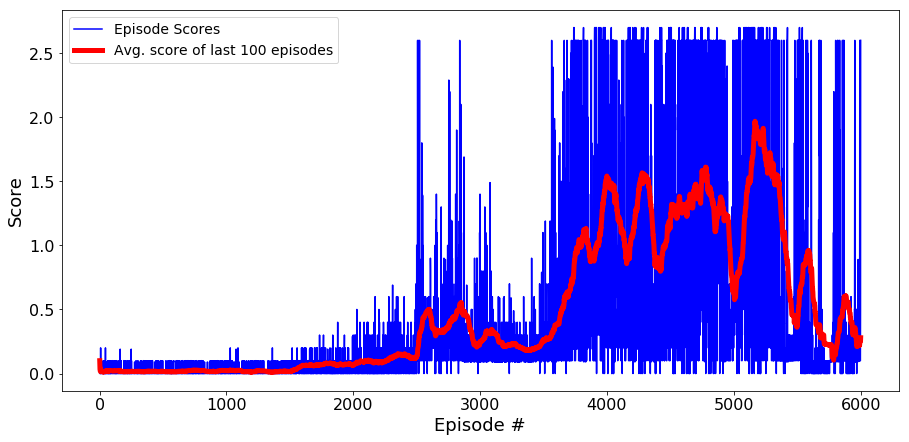

In [18]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_csv['scores'])+1), scores_csv['scores'],'b',label='Episode Scores')
plt.plot(np.arange(1, len(scores_csv['averages'])+1), (scores_csv['averages']),'r',\
         linewidth=5,label='Avg. score of last 100 episodes')
plt.ylabel('Score', fontsize=18)
plt.xlabel('Episode #', fontsize=18)
ax.legend(fontsize=14)
plt.show()